<a href="https://colab.research.google.com/github/KenyanGeek/Australian-birds-classifier/blob/master/BPM_detector_Version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Here i import google drive for me to access my data

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#These are the beats per minute that i am training for 

labels  = ['119','106']

In [0]:
!mkdir '/content/drive/My Drive/audio/spectrogram/'


In [0]:
import os
import glob
import shutil
from pathlib import Path 
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import librosa
import librosa.display

import numpy as np
def create_fold_spectrograms(fold):
    spectrogram_path = Path('/content/drive/My Drive/audio/spectrogram/')  
    audio_path = Path('/content/drive/My Drive/audio/')  
    print(f'Processing fold {fold}')
    os.mkdir(spectrogram_path/fold)
    for audio_file in list(Path(audio_path/f'fold{fold}').glob('*.wav')):
        samples, sample_rate = librosa.load(audio_file)
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        filename  = spectrogram_path/fold/Path(audio_file).name.replace('.wav','.png')
        S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close('all')

In [8]:

#This call here creates spectograms that are saved in the different folds
for i in range(1, 3):
    create_fold_spectrograms(str(i))

Processing fold 1
Processing fold 2


In [0]:
!mkdir '/content/drive/My Drive/audio/data'


In [0]:
  
data_path = Path('/content/drive/My Drive/audio/data/') 
spectrogram_path = Path('/content/drive/My Drive/audio/spectrogram/')  
def create_fold_directory(fold):
    png_files =  list(Path(spectrogram_path/fold).glob('*.png'))
    os.mkdir(data_path/fold)
    os.mkdir(data_path/fold/'train')
    os.mkdir(data_path/fold/'valid')
    for label in labels:
        os.mkdir(data_path/fold/'train'/label)
        os.mkdir(data_path/fold/'valid'/label)
     
    for file in png_files:
        label = file.as_posix().split('-')[1]
        shutil.copyfile(file, data_path/fold/'valid'/labels[int(label)]/file.name)   
    
    for i in range(1,3):       
        if str(i) == fold:
            continue
        png_files =  list(Path(spectrogram_path/str(i)).glob('*.png'))
        for file in png_files:
            label = file.as_posix().split('-')[1]
            shutil.copyfile(file, data_path/fold/'train'/labels[int(label)]/file.name)
    

In [0]:

for i in range(1,3):
    create_fold_directory(str(i))

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [21]:
data_directory = Path('/content/drive/My Drive/audio/data')
# don't use any transformations because it doesn't make sense in the case of a spectrogram
# i.e. flipping a spectrogram changes the meaning
data = ImageDataBunch.from_folder(data_directory/'1', ds_tfms=[], size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (239 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
119,119,119,119,119
Path: /content/drive/My Drive/audio/data/1;

Valid: LabelList (442 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
119,119,119,119,119
Path: /content/drive/My Drive/audio/data/1;

Test: None

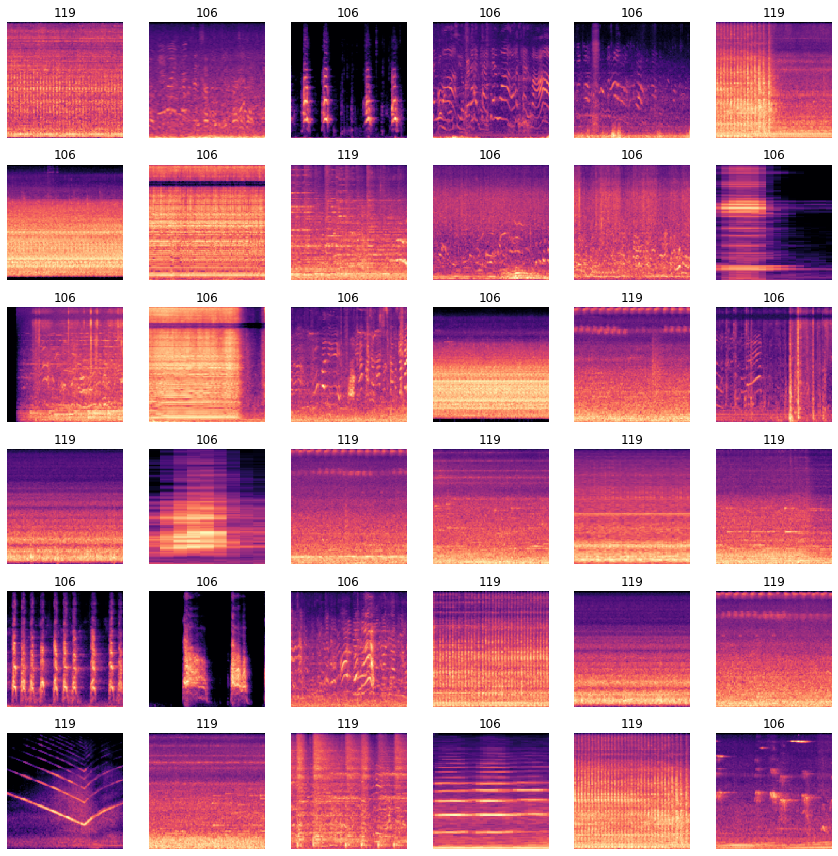

In [22]:
data.show_batch(rows=6, figsize=(12,12))


In [0]:
def process_fold(fold):
    data_directory = Path('/content/drive/My Drive/audio/data')
    data = ImageDataBunch.from_folder(data_directory/fold, ds_tfms=[], size=224)
    data.normalize(imagenet_stats)
    learn = create_cnn(data, models.resnet34, metrics=accuracy)
    learn.fit_one_cycle(3)
    learn.unfreeze()
    learn.fit_one_cycle(1)
    learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [24]:
process_fold('1')


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 40.8MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.288793,1.117410,0.597285,00:04
1,0.897056,1.320104,0.631222,00:04
2,0.647867,1.268215,0.671946,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.229066,0.991989,0.778281,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.080881,0.958728,0.794118,00:04
1,0.066373,0.969297,0.800905,00:04
2,0.058153,1.000206,0.809955,00:04


In [25]:
process_fold('2')


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.043217,0.712491,0.707113,00:04
1,0.707450,0.502231,0.786611,00:04
2,0.555005,0.184071,0.916318,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.345207,0.192895,0.945607,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.215951,0.095028,0.974895,00:04
1,0.158384,0.035596,0.987448,00:04
2,0.134119,0.024951,0.991632,00:04


In [0]:
process_fold('3')



/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.731893,1.532504,0.564897,00:20
1,0.967093,1.613720,0.564897,00:19
2,0.617324,1.544565,0.569322,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.616467,2.454398,0.545723,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.336127,1.824389,0.600295,00:25
1,0.241810,1.634395,0.625369,00:25
2,0.191719,1.621637,0.622419,00:25


In [0]:
process_fold('4')


IndexError: ignored